<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#How-variative-are-the-prices-from-the-same-category?" data-toc-modified-id="How-variative-are-the-prices-from-the-same-category?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>How variative are the prices from the same category?</a></span></li><li><span><a href="#How-is-the-price-calculated?" data-toc-modified-id="How-is-the-price-calculated?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>How is the price calculated?</a></span><ul class="toc-item"><li><span><a href="#Simple-payment" data-toc-modified-id="Simple-payment-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Simple payment</a></span></li><li><span><a href="#Multiple-purchase-with-multpiple-payment" data-toc-modified-id="Multiple-purchase-with-multpiple-payment-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Multiple purchase with multpiple payment</a></span></li></ul></li><li><span><a href="#Does-product-price-changes-overtime?" data-toc-modified-id="Does-product-price-changes-overtime?-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Does product price changes overtime?</a></span></li><li><span><a href="#How-many-products-have-dynamic-price?" data-toc-modified-id="How-many-products-have-dynamic-price?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>How many products have dynamic price?</a></span></li><li><span><a href="#How-many-orders-each-users-made?" data-toc-modified-id="How-many-orders-each-users-made?-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>How many orders each users made?</a></span></li><li><span><a href="#How-many-orders-each-products-made?" data-toc-modified-id="How-many-orders-each-products-made?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>How many orders each products made?</a></span></li><li><span><a href="#How-much-does-sales-affect-price?" data-toc-modified-id="How-much-does-sales-affect-price?-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>How much does sales affect price?</a></span></li><li><span><a href="#Do-holidays-affect-sales-&amp;-prices?" data-toc-modified-id="Do-holidays-affect-sales-&amp;-prices?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Do holidays affect sales &amp; prices?</a></span></li><li><span><a href="#How-much-does-voucher-affect-sales?" data-toc-modified-id="How-much-does-voucher-affect-sales?-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>How much does voucher affect sales?</a></span></li><li><span><a href="#Does-voucher-increase-future-sales-&amp;-revenue?" data-toc-modified-id="Does-voucher-increase-future-sales-&amp;-revenue?-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Does voucher increase future sales &amp; revenue?</a></span></li><li><span><a href="#Is-there-any-discounts-(payment-<-price-+-freigt_value)?" data-toc-modified-id="Is-there-any-discounts-(payment-<-price-+-freigt_value)?-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Is there any discounts (payment &lt; price + freigt_value)?</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

In [2]:
items_df = pd.read_csv('../data/olist_order_items_dataset.csv')
payments_df = pd.read_csv('../data/olist_order_payments_dataset.csv')
orders_df = pd.read_csv('../data/olist_orders_dataset.csv')
customers_df = pd.read_csv('../data/olist_customers_dataset.csv')
products_df = pd.read_csv('../data/olist_products_dataset.csv')

translation = pd.read_csv('../data/product_category_name_translation.csv')
translation = translation.set_index('product_category_name')['product_category_name_english'].to_dict()

In [3]:
items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
102806,e97b6c48831b0c7d2bdfe4ea2f18108f,1,7e8c9cebda42cbe9ae5ae912f81db940,57e632711dec9ec14ca7546769483e7e,2017-06-29 00:24:08,89.90,15.38
23832,364bfe8be0f9a89a9a817d0e8ecd859c,1,0b814a3c8fa6dbb849df7c28c1bd6831,3ade81dab5a172b88e1871c28ae05260,2018-04-09 01:28:15,169.00,28.04
60996,8b04755969f401703034739a68acf0b3,1,28701167ae1ea90aa657c81171d61c30,2e1c9f22be269ef4643f826c9e650a52,2018-05-22 18:59:00,49.49,7.39
10372,17bc0acf9f5ac57fc41fb222543c3c46,1,b59fb744c6f3cd1dc23b10f760848d98,916748bc99315c2d202898ae58b1617e,2017-03-23 11:55:04,9.90,10.96
98738,dff7f8766eb0c26b8cfbc2147c33e1e4,1,7fb04722aba7a2b632bac8f9819796f3,f3b80352b986ab4d1057a4b724be19d0,2017-11-22 21:13:13,80.00,20.96


In [5]:
payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
68089,cecd9c6ae9fe969cdedf8c252eeaac73,1,credit_card,5,738.57
9783,e6249cf2ec8f9ed63814e33eef1536bd,1,credit_card,3,394.16
79079,9c9de9ca209ab5a4f0b1e55730231247,1,credit_card,4,218.78
98140,b17c37c07ccd370cd72a1884f380c532,1,credit_card,5,259.56
88967,bfb04781e6dc96f737795a633dfd1b80,1,credit_card,1,79.62


In [6]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
19905,794aed17c07925f8c6138132f58bacb0,608b235bb52e5e23510caaca87b207ae,delivered,2017-08-15 20:58:59,2017-08-15 23:04:22,2017-08-17 16:30:09,2017-08-28 20:49:58,2017-09-06 00:00:00
45237,078c97da8566e6052ff4f0925dadcbb4,d35a516e27873b344b2b9bc4ff2634a1,delivered,2018-01-27 10:45:45,2018-01-27 10:57:19,2018-01-29 18:58:54,2018-02-22 18:51:39,2018-02-23 00:00:00
68470,59ad806bb1a82c19e0feadc488939a89,bbf5e4f5d513a583fda9a03c05bc4917,delivered,2017-11-25 12:06:48,2017-11-25 12:17:30,2017-11-28 20:22:32,2017-12-11 19:58:55,2017-12-19 00:00:00
87073,2e1071b4baf7fcace9e44057dbc32fbd,364459e1449293f93efb99239e0494d5,delivered,2017-05-01 17:56:51,2017-05-01 18:05:38,2017-05-02 15:14:24,2017-05-11 10:23:00,2017-05-23 00:00:00
10424,7ea99d68cb579648ac731e90414707f0,602abe909c748c9f6cd73a3a4d66ed99,delivered,2017-06-17 13:09:55,2017-06-17 13:23:11,2017-06-21 09:58:45,2017-06-30 12:54:49,2017-07-13 00:00:00


In [7]:
products_df[products_df.product_category_name=='agro_industria_e_comercio']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
79,07f01b6fcacc1b187a71e5074199db2d,agro_industria_e_comercio,39.0,430.0,1.0,16400.0,63.0,66.0,56.0
720,613d093272cb8f74f25a01e430155a6a,agro_industria_e_comercio,39.0,326.0,1.0,1050.0,38.0,41.0,39.0
1016,980ecbcc15fe174ec1e5757c4d75b1bf,agro_industria_e_comercio,48.0,157.0,1.0,250.0,17.0,3.0,10.0
1412,ba1d7e7ee1f055d252a2faa8ea3cea9b,agro_industria_e_comercio,59.0,693.0,6.0,1900.0,45.0,15.0,40.0
2642,137ace556a03792cdc43f91ec621426d,agro_industria_e_comercio,48.0,1268.0,1.0,550.0,16.0,19.0,11.0
...,...,...,...,...,...,...,...,...,...
29416,8a67e4e6cc6f2abf65fe2164ea51b219,agro_industria_e_comercio,47.0,216.0,1.0,250.0,25.0,10.0,15.0
30284,c75a6578b6475cf760d40cb340b3971c,agro_industria_e_comercio,55.0,435.0,3.0,9950.0,65.0,26.0,26.0
30527,5fb0955cb683eb6f65a1f613e502eef5,agro_industria_e_comercio,36.0,471.0,1.0,4000.0,50.0,30.0,40.0
31094,cd5df6a3db7a3d064a55afd08289d762,agro_industria_e_comercio,52.0,860.0,1.0,2150.0,30.0,25.0,15.0


In [8]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

### How variative are the prices from the same category?

In [9]:
items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [10]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [11]:
products_df.merge(items_df[['product_id', 'price']], on='product_id').groupby('product_category_name').price.std().sort_values()

product_category_name
cds_dvds_musicais                  9.944903
flores                            16.737759
fraldas_higiene                   25.081963
fashion_roupa_infanto_juvenil     31.831886
fashion_roupa_feminina            39.173717
                                    ...    
instrumentos_musicais            446.041029
eletroportateis                  471.259273
eletrodomesticos_2               544.416488
portateis_casa_forno_e_cafe      609.848752
pcs                              668.513798
Name: price, Length: 73, dtype: float64

### How is the price calculated?

**findings:**

* `payment_sequential` yang beda (1, 2, dst) dijumlahin untuk hitung total, tapi kalo `payment_sequential` -nya sama jangan dijumlah
* `order_item_id` yang beda dijumlahkan price & freight value nya untuk hitugn total, tapi kalo `order_item_id` -nya sama jangan dijumlah

#### Simple payment

In [12]:
payments_df[payments_df.order_id=='6e585d7418d756180db763b08c37e372'].payment_value

90940    44.99
Name: payment_value, dtype: float64

In [13]:
print(items_df[items_df.order_id=='6e585d7418d756180db763b08c37e372'].price)
print(items_df[items_df.order_id=='6e585d7418d756180db763b08c37e372'].freight_value)
print(items_df[items_df.order_id=='6e585d7418d756180db763b08c37e372'].price + \
      items_df[items_df.order_id=='6e585d7418d756180db763b08c37e372'].freight_value)

48557    27.0
Name: price, dtype: float64
48557    17.99
Name: freight_value, dtype: float64
48557    44.99
dtype: float64


#### Multiple purchase with multpiple payment

In [14]:
poi_order_id = '3689194c14ad4e2e7361ebd1df0e77b0'
print('total price:', items_df[items_df.order_id==poi_order_id].price.sum() + items_df[items_df.order_id==poi_order_id].freight_value.sum())
display(items_df[items_df.order_id==poi_order_id])

print('total payment:', payments_df[payments_df.order_id==poi_order_id].payment_value.sum())
payments_df[payments_df.order_id==poi_order_id]

total price: 153.26999999999998


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
23938,3689194c14ad4e2e7361ebd1df0e77b0,1,b532349fe46b38fbc7bb3914c1bdae07,1025f0e2d44d7041d6cf58b6550e0bfa,2017-10-26 16:14:29,38.4,12.69
23939,3689194c14ad4e2e7361ebd1df0e77b0,2,b532349fe46b38fbc7bb3914c1bdae07,1025f0e2d44d7041d6cf58b6550e0bfa,2017-10-26 16:14:29,38.4,12.69
23940,3689194c14ad4e2e7361ebd1df0e77b0,3,b532349fe46b38fbc7bb3914c1bdae07,1025f0e2d44d7041d6cf58b6550e0bfa,2017-10-26 16:14:29,38.4,12.69


total payment: 153.26999999999998


,order_id,payment_sequential,payment_type,payment_installments,payment_value
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
21801,3689194c14ad4e2e7361ebd1df0e77b0,1,credit_card,1,95.74


### Does product price changes overtime?

In [15]:
items_df.product_id.nunique()

32951

In [16]:
items_df[items_df.product_id==items_df.product_id.value_counts().index[-1]].price.std()

nan

In [17]:
for product_id in items_df.product_id.value_counts().index[:20]:
    print(product_id, 'std:',items_df[items_df.product_id==product_id].price.std(), 'orders:', len(items_df[items_df.product_id==product_id]))

aca2eb7d00ea1a7b8ebd4e68314663af std: 3.67072277208614 orders: 527
99a4788cb24856965c36a24e339b6058 std: 3.489328166658102 orders: 488
422879e10f46682990de24d770e7f83d std: 4.372601014669534 orders: 484
389d119b48cf3043d311335e499d9c6b std: 4.524637228849473 orders: 392
368c6c730842d78016ad823897a372db std: 4.484718006361109 orders: 388
53759a2ecddad2bb87a079a1f1519f73 std: 4.609128455739573 orders: 373
d1c427060a0f73f6b889a5c7c61f2ac4 std: 17.136724738220856 orders: 343
53b36df67ebb7c41585e8d54d6772e08 std: 20.327901584091997 orders: 323
154e7e31ebfa092203795c972e5804a6 std: 1.9347779023096907 orders: 281
3dd2a17168ec895c781a9191c1e95ad7 std: 0.6041220933301769 orders: 274
2b4609f8948be18874494203496bc318 std: 4.402795267970812 orders: 260
7c1bd920dbdf22470b68bde975dd3ccf std: 2.821231114748179 orders: 231
a62e25e09e05e6faf31d90c6ec1aa3d1 std: 1.5012089523394372 orders: 226
5a848e4ab52fd5445cdc07aab1c40e48 std: 0.0 orders: 197
bb50f2e236e5eea0100680137654686c std: 2.5037640181384866 o

### How many products have dynamic price?

In [18]:
items_price_std = items_df.groupby('product_id').price.std()
print('items with dynamic price:', items_price_std[items_price_std.notna() & items_price_std!=0].count())
print('items without dynamic price:', items_price_std[~(items_price_std.notna() & items_price_std!=0)].count())

items with dynamic price: 5900
items without dynamic price: 8934


### How many orders each users made?

In [19]:
orders_df.customer_id.value_counts()

9ef432eb6251297304e76186b10a928d    1
413f7e58270a32396af030a075b924be    1
eb4350b67a0264c67e5e06a038e4afbb    1
622b07d262d545d16efbd4363a89cb91    1
c701fbfa77791abd05eef9eacf7ea7a8    1
                                   ..
39585f08d13377e50fde35467984e6eb    1
eb3d995301c320683de629f5b4dd0c78    1
f2507ea56d748a23037bb1214964e87d    1
ae8269d850cd3a3d06a56877c450b3f8    1
edb027a75a1449115f6b43211ae02a24    1
Name: customer_id, Length: 99441, dtype: int64

In [20]:
orders_df.merge(customers_df[['customer_id', 'customer_unique_id']], on='customer_id').customer_unique_id.value_counts()

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
d6fe1d8f8260d270ec05c8b3065c8eaa     1
8c0386035e15f02612c89d29d7694b41     1
c1c0e094a7fbde66794da6ee9f9d1dda     1
6d90b4cc432b22857f3660864f240b0c     1
60350aa974b26ff12caad89e55993bd6     1
Name: customer_unique_id, Length: 96096, dtype: int64

In [21]:
orders_df.merge(customers_df[['customer_id', 'customer_unique_id']], on='customer_id').customer_unique_id.value_counts().mean()

1.0348089410589412

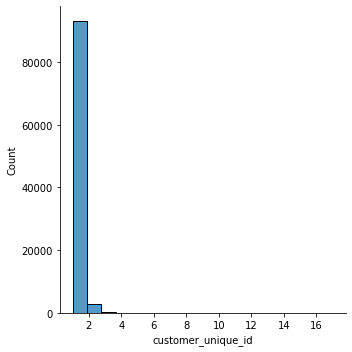

In [23]:
sns.displot(orders_df.merge(customers_df[['customer_id', 'customer_unique_id']], on='customer_id').customer_unique_id.value_counts())

### How many orders each products made?

In [24]:
items_df.product_id.value_counts()

aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: product_id, Length: 32951, dtype: int64

In [25]:
print('test')

test


In [26]:
items_df.product_id.value_counts().values[:100]

array([527, 488, 484, 392, 388, 373, 343, 323, 281, 274, 260, 231, 226,
       197, 195, 194, 183, 183, 169, 165, 160, 156, 156, 155, 154, 150,
       149, 146, 143, 143, 142, 141, 141, 140, 138, 137, 131, 127, 127,
       123, 123, 120, 119, 119, 118, 117, 115, 114, 113, 111, 109, 107,
       106, 106, 104, 103, 101,  99,  97,  97,  97,  95,  95,  94,  94,
        93,  93,  93,  93,  92,  91,  91,  90,  89,  89,  89,  89,  88,
        88,  88,  87,  86,  84,  84,  84,  84,  80,  79,  77,  75,  74,
        74,  73,  73,  72,  72,  72,  72,  72,  71])

In [27]:
items_df.product_id.value_counts().values[1800:2000]

array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9])

In [28]:
items_df.product_id.value_counts().mean()

3.4187126339109586

In [29]:
items_df.set_index('product_id', drop=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
product_id,,,,,,,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
4aa6014eceb682077f9dc4bffebc05b0,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
32e07fd915822b0765e448c4dd74c828,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
72a30483855e2eafc67aee5dc2560482,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95


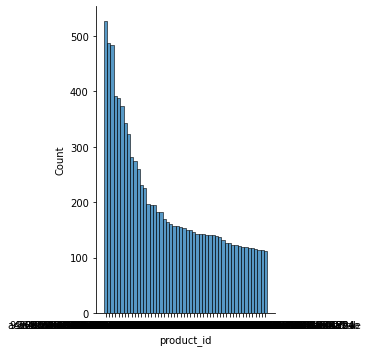

In [30]:
# only top 50 most sold products for better visualization
poi_product_ids = items_df.product_id.value_counts().index[:50] 
poi_items_df = items_df.set_index('product_id', drop=False).loc[poi_product_ids].reset_index(drop=False)

ax = sns.displot(poi_items_df.product_id)

### How much does sales affect price?

In [58]:
products_df = products_df.dropna(axis=0)

In [59]:
orders_product_df = orders_df.merge(items_df[['order_id', 'product_id', 'price']], on='order_id')
orders_product_df = orders_product_df.merge(products_df[['product_id', 'product_category_name']], on='product_id')
orders_product_df = orders_product_df.merge(payments_df[['order_id', 'payment_type']], on='order_id')
orders_product_df['order_purchase_timestamp'] = pd.to_datetime(orders_product_df['order_purchase_timestamp'])
orders_product_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,product_category_name,payment_type
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,credit_card
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,voucher
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,voucher
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,credit_card
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,87285b34884572647811a353c7ac498a,29.99,utilidades_domesticas,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...
115897,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,0df37da38a30a713453b03053d60d3f7,356.00,esporte_lazer,credit_card
115898,e8fd20068b9f7e6ec07068bb7537f781,609b9fb8cad4fe0c7b376f77c8ab76ad,delivered,2017-08-10 21:21:07,2017-08-10 21:35:26,2017-08-18 16:42:51,2017-08-23 15:36:29,2017-08-31 00:00:00,0df37da38a30a713453b03053d60d3f7,356.00,esporte_lazer,credit_card
115899,cfa78b997e329a5295b4ee6972c02979,a2f7428f0cafbc8e59f20e1444b67315,delivered,2017-12-20 09:52:41,2017-12-20 10:09:52,2017-12-20 20:25:25,2018-01-26 15:45:14,2018-01-18 00:00:00,3d2c44374ee42b3003a470f3e937a2ea,55.90,instrumentos_musicais,credit_card
115900,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,ac35486adb7b02598c182c2ff2e05254,72.00,beleza_saude,credit_card


In [ ]:
def aggregate_sales_and_price(data, by):
    data = data.copy()
    data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
    
    data['sales'] = 1
    data_sales = data.groupby([by, pd.Grouper(key='order_purchase_timestamp', freq='d')])['sales'] \
           .sum() \
           .reset_index() \
           .sort_values('order_purchase_timestamp')
    
    data_price = data.groupby([by, pd.Grouper(key='order_purchase_timestamp', freq='d')])['price'] \
           .mean() \
           .reset_index() \
           .sort_values('order_purchase_timestamp')
    
    data_sales_price = data_sales.merge(data_price, on=[by, 'order_purchase_timestamp'])
    
    return data_sales_price

In [60]:
# data_sales_price = data_sales.merge(data_price, on=['product_id', 'order_purchase_timestamp'])
# orders_product_df = data_sales_price.merge(products_df[['product_id', 'product_category_name']], on=['product_id'])
# orders_product_df

orders_product_df = aggregate_sales_and_price(orders_product_df, by='product_id')
orders_product_df = orders_product_df.merge(products_df[['product_id', 'product_category_name']], on=['product_id'])

In [61]:
def get_interpolated_timestamp(timestamp):
    """ Fill in missing mondays between timestamp gap
    
    NOTE: the timestamp series must already be sorted!
    """
    
    return pd.date_range(start=timestamp.iloc[0], end=timestamp.iloc[-1], freq='d').to_frame(name='order_purchase_timestamp')

def apply_interpolation(product_sales_history, id, by='product_id'):
    """ Fill in the gaps between sales & price timestamps """
    
    product_sales_history = product_sales_history.sort_values('order_purchase_timestamp')
    timestamp = get_interpolated_timestamp(product_sales_history['order_purchase_timestamp'])
    product_sales_history = product_sales_history.merge(timestamp, 
                                                        on='order_purchase_timestamp', 
                                                        how='outer').sort_values('order_purchase_timestamp')
    product_sales_history['sales'] = product_sales_history['sales'].fillna(0)
    product_sales_history['price'] = product_sales_history['price'].fillna(method='ffill')    
    product_sales_history[by] = id
    product_sales_history['product_category_name'] = product_sales_history['product_category_name'].iloc[0]
    
    return product_sales_history

In [64]:
from tqdm import tqdm

interpolated_data = pd.DataFrame()
for product_id, product in tqdm(orders_product_df.groupby('product_id')):
    interpolated_data = pd.concat([interpolated_data, apply_interpolation(product, product_id, by='product_id')])

100%|█████████████████████████████████████████████| 32340/32340 [38:37<00:00, 13.96it/s]


In [ ]:
orders_product_df = pd.concat(interpolated_data, axis=0)
orders_product_df

In [65]:
interpolated_data.shape

(2001372, 5)

In [66]:
orders_product_df = interpolated_data.copy()

In [68]:
# orders_product_df.to_csv('../data/prepared/orders_product.csv')
orders_product_df = pd.read_csv('../data/prepared/orders_product.csv')

In [69]:
orders_product_df

,product_id,order_purchase_timestamp,sales,price,product_category_name
0,00066f42aeeb9f3007548bb9d3f33c38,2018-05-20,1.0,101.65,perfumaria
0,00088930e925c41fd95ebfe695fd2655,2017-12-12,1.0,129.90,automotivo
0,0009406fd7479715e4bef61dd91f2462,2017-12-21,1.0,229.00,cama_mesa_banho
0,000b8f95fcb9e0096488278317764d19,2018-08-01,1.0,58.90,utilidades_domesticas
2,000b8f95fcb9e0096488278317764d19,2018-08-02,0.0,58.90,utilidades_domesticas
...,...,...,...,...,...
3,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-07,1.0,34.99,informatica_acessorios
130,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-08,0.0,34.99,informatica_acessorios
131,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-09,0.0,34.99,informatica_acessorios
4,fffdb2d0ec8d6a61f0a0a0db3f25b441,2018-08-10,1.0,34.99,informatica_acessorios


In [71]:
orders_product_df = aggregate_sales_and_price(orders_product_df, by='product_category_name')
orders_product_df

,product_category_name,order_purchase_timestamp,sales,price
0,moveis_decoracao,2016-09-04,2,36.445
1,telefonia,2016-09-05,1,59.500
2,moveis_decoracao,2016-09-05,1,39.990
3,moveis_decoracao,2016-09-06,1,39.990
4,moveis_decoracao,2016-09-07,1,39.990
...,...,...,...,...
38228,moveis_cozinha_area_de_servico_jantar_e_jardim,2018-08-30,1,145.000
38229,moveis_cozinha_area_de_servico_jantar_e_jardim,2018-08-31,1,145.000
38230,moveis_cozinha_area_de_servico_jantar_e_jardim,2018-09-01,1,145.000
38231,moveis_cozinha_area_de_servico_jantar_e_jardim,2018-09-02,1,145.000


In [91]:
# orders_product_df[orders_product_df.product_category_name=='moveis_decoracao']
orders_product_df[orders_product_df.product_category_name=='cool_stuff'].sort_values('order_purchase_timestamp')

,product_category_name,order_purchase_timestamp,sales,price
45,cool_stuff,2016-10-04,2,89.450000
70,cool_stuff,2016-10-05,1,89.000000
75,cool_stuff,2016-10-06,4,90.175000
103,cool_stuff,2016-10-07,6,159.366667
138,cool_stuff,2016-10-08,4,173.700000
...,...,...,...,...
38090,cool_stuff,2018-08-24,5,91.036000
38108,cool_stuff,2018-08-25,6,88.028333
38144,cool_stuff,2018-08-26,4,100.070000
38192,cool_stuff,2018-08-27,3,67.093333


In [77]:
orders_product_df.to_csv('../data/prepared/interpolated_demand_history_by_category.csv')

In [78]:
orders_product_df['order_purchase_timestamp'].sort_values()

0       2016-09-04
1       2016-09-05
2       2016-09-05
3       2016-09-06
4       2016-09-07
           ...    
38228   2018-08-30
38229   2018-08-31
38230   2018-09-01
38231   2018-09-02
38232   2018-09-03
Name: order_purchase_timestamp, Length: 38233, dtype: datetime64[ns]

In [26]:
def timestamp_to_week(x):
    week = (int(x.strftime('%Y')) - 2016) * 52
    week += x.week
    return week
orders_product_df['order_purchase_week'] = orders_product_df['order_purchase_timestamp'].apply(timestamp_to_week)

In [ ]:
def timestamp_to_day(x):
    return x.strftime('%Y-%m-%d')
orders_product_df['order_purchase_day'] = pd.to_datetime(orders_product_df['order_purchase_timestamp'].apply(timestamp_to_day))

In [46]:
orders_product_df.product_category_name.value_counts()

moveis_decoracao                                 624
esporte_lazer                                    615
beleza_saude                                     613
cama_mesa_banho                                  613
informatica_acessorios                           607
                                                ... 
fashion_roupa_infanto_juvenil                     62
flores                                            59
cds_dvds_musicais                                 50
seguros_e_servicos                                35
portateis_cozinha_e_preparadores_de_alimentos     24
Name: product_category_name, Length: 73, dtype: int64

In [85]:
def get_poi_product(id):
    return orders_product_df[orders_product_df.product_category_name==id].reset_index(drop=True)

poi_product = get_poi_product('cool_stuff')

In [86]:
poi_product = poi_product.sort_values('order_purchase_timestamp')

In [87]:
poi_sales = poi_product.sales
poi_price = poi_product.price
poi_revenue = (poi_sales * poi_price)

poi_sales.name = 'sales'
poi_revenue.name = 'revenue'

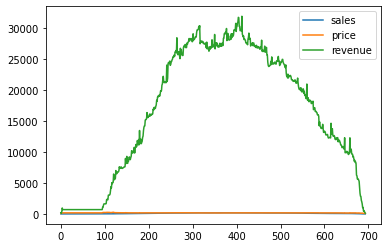

In [88]:
poi_sales.plot()
poi_price.plot()
poi_revenue.plot()
plt.legend()

In [89]:
def twin_lineplot(sr1, sr2):
    plt.figure(figsize=(18, 5))
    ax = sr1.plot(legend=False)
    ax2 = ax.twinx()
    sr2.plot(legend=False, ax=ax2, color="r")
    ax.figure.legend()

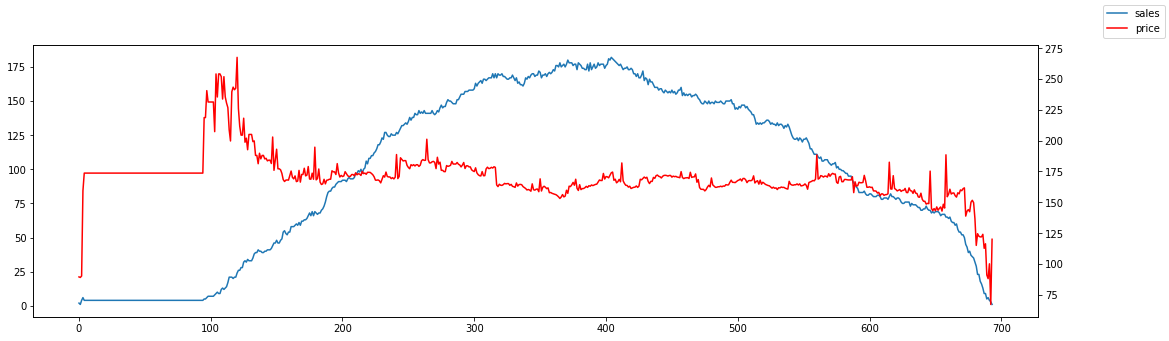

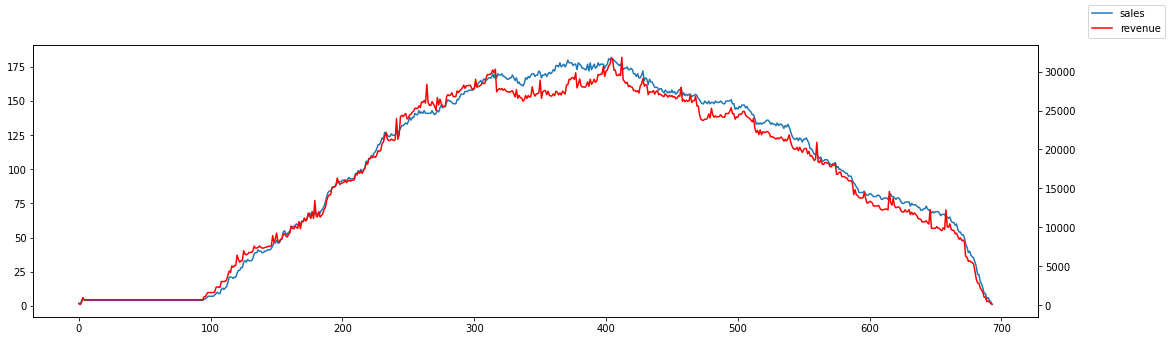

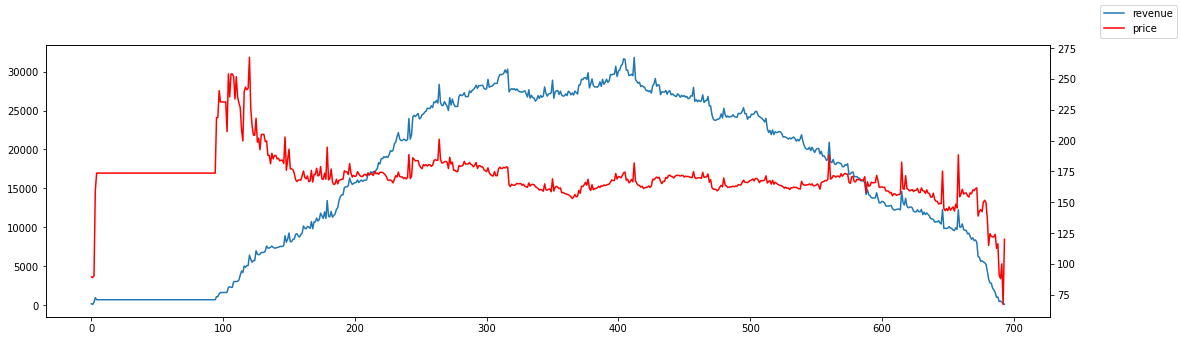

In [90]:
twin_lineplot(poi_sales, poi_price)
twin_lineplot(poi_sales, poi_revenue)
twin_lineplot(poi_revenue, poi_price)

### Do holidays affect sales & prices?

TODO:
* Make list of holiday dates
* plot sales & price with highlighted holidays

### How much does voucher affect sales?

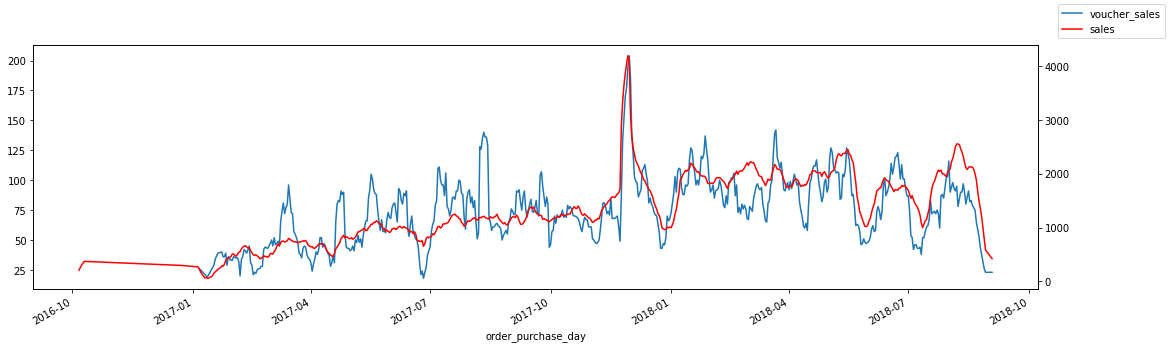

In [39]:
voucher_purchase = orders_product_df.groupby('payment_type').get_group('voucher').groupby('order_purchase_day').order_id.count().rolling(7).sum()
all_purchase = orders_product_df.groupby('order_purchase_day').order_id.count().rolling(7).sum()

voucher_purchase.name = 'voucher_sales'
all_purchase.name = 'sales'

twin_lineplot(voucher_purchase, all_purchase)

### Does voucher increase future sales & revenue?

In [40]:
poi_product

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,payment_type,order_purchase_week,order_purchase_day
54,25f4376934e13d3508486352e11a5db0,12fd2740039676063a874b9567dfa651,delivered,2018-05-17 16:59:11,2018-05-18 01:17:39,2018-05-18 13:02:00,2018-05-21 15:22:11,2018-05-25 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,124,2018-05-17
238,6d7de866a140b19d09e825b2a4e944c7,9e5ce657315b2bdb94033a494041ac25,delivered,2018-04-16 21:07:16,2018-04-16 22:10:15,2018-04-17 20:54:27,2018-04-24 20:38:55,2018-05-15 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,120,2018-04-16
239,6d7de866a140b19d09e825b2a4e944c7,9e5ce657315b2bdb94033a494041ac25,delivered,2018-04-16 21:07:16,2018-04-16 22:10:15,2018-04-17 20:54:27,2018-04-24 20:38:55,2018-05-15 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,120,2018-04-16
267,a0d5b8474423ddf55228373b81a46272,3f7d26944f7f68bd2ac23b5e8b500ab0,delivered,2018-01-11 16:51:17,2018-01-12 02:38:34,2018-01-15 17:24:13,2018-01-22 21:18:33,2018-02-07 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,boleto,106,2018-01-11
764,f29d0fd6d4e6d5ce550e0b2f9335116c,55216cd56c9eaadec16f03d5aaf11d86,delivered,2018-05-17 16:34:49,2018-05-19 02:59:02,2018-05-21 13:45:00,2018-06-09 00:14:23,2018-06-13 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,boleto,124,2018-05-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,1f52d261d5a103a2a2375c21c99cd08d,6ec06eba01982607b43609eae1f3798b,delivered,2018-05-09 12:27:01,2018-05-09 12:55:48,2018-05-10 12:07:00,2018-05-11 20:57:36,2018-05-17 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,123,2018-05-09
115338,9d01fa0e65583ec53f3864ee0e73d015,91d8e6ba148d6e55b4bb98a7af766101,delivered,2018-02-13 21:54:39,2018-02-14 21:50:28,2018-02-16 00:09:36,2018-03-17 14:36:27,2018-03-05 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,111,2018-02-13
116114,15847be2cbb3423e9344e53b040ef2a6,38658a45235ad07f51a84607654e53f1,delivered,2018-01-13 00:21:59,2018-01-13 00:58:27,2018-01-15 23:51:49,2018-02-01 01:53:10,2018-02-09 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,106,2018-01-13
116524,ac88d96f79bb0884df747b9c38fe48f7,ced8f3419d9a7d7fec840b843b36d6c2,delivered,2018-03-11 18:14:17,2018-03-11 18:28:00,2018-03-12 23:18:58,2018-04-15 15:28:40,2018-04-05 00:00:00,aca2eb7d00ea1a7b8ebd4e68314663af,69.9,credit_card,114,2018-03-11


In [41]:
poi_product['get_voucher'] = poi_product.payment_type=='voucher'

/tmp/ipykernel_10529/1095615001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poi_product['get_voucher'] = poi_product.payment_type=='voucher'


In [42]:
poi_sales = poi_product.groupby('order_purchase_day').product_id.count()
poi_price = poi_product.groupby('order_purchase_day').price.mean()
poi_voucher = poi_product.groupby('order_purchase_day').get_voucher.sum()
poi_revenue = (poi_sales * poi_price)
poi_profit = (poi_revenue - (poi_voucher * poi_price))

poi_sales.name = 'sales'
poi_revenue.name = 'revenue'
poi_voucher.name = 'voucher'
poi_profit.name = 'profit'

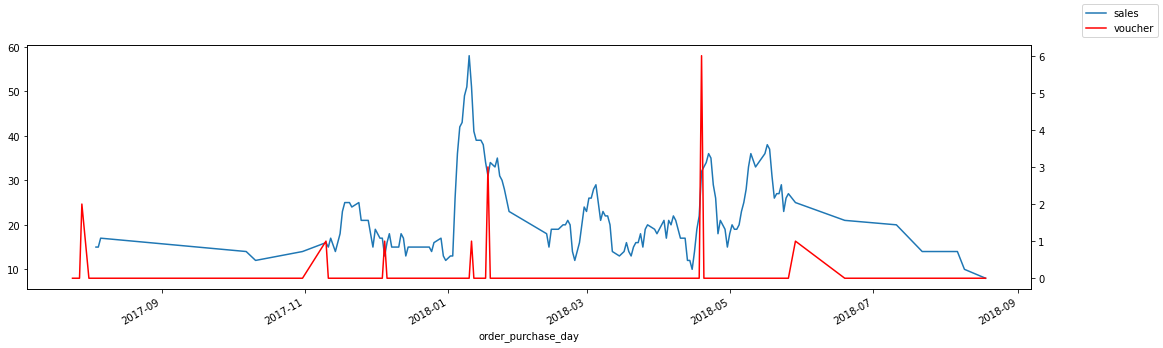

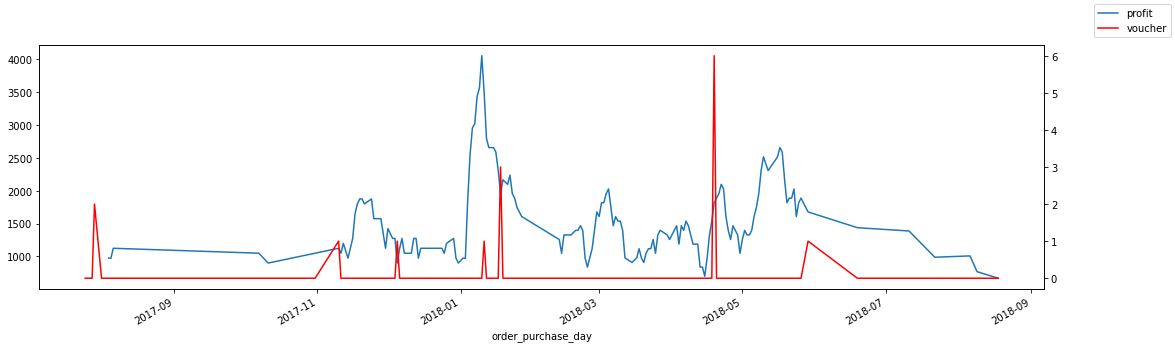

In [43]:
twin_lineplot(poi_sales.rolling(7).sum(), poi_voucher)
twin_lineplot(poi_profit.rolling(7).sum(), poi_voucher)
# twin_lineplot(poi_sales, poi_revenue)
# twin_lineplot(poi_revenue, poi_price)

In [ ]:
sales: 100, 120, 150, 100, 120, 120, 110, 120,
price: 50, 50,   40 ,  50,  45,  50,  50,  45, 
    
[]

* 12,989%
- 130, 120

* no discount
* 10% first week
* 10% first & last week
    
- 120, 110, 90, 70
- 120, 120, 100, 90
- 120, 120, 110, 120




/tmp/ipykernel_10529/3104668339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poi_product['get_voucher'] = poi_product.payment_type=='voucher'
/tmp/ipykernel_10529/3104668339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poi_product['get_voucher'] = poi_product.payment_type=='voucher'
/tmp/ipykernel_10529/3104668339.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

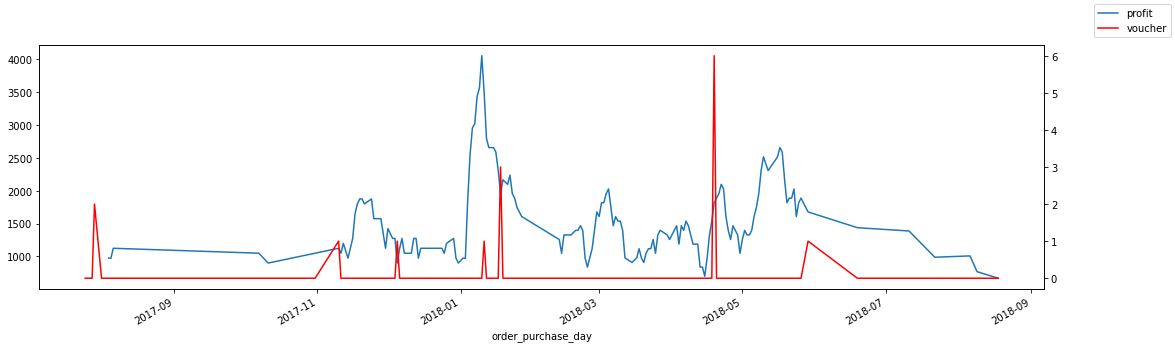

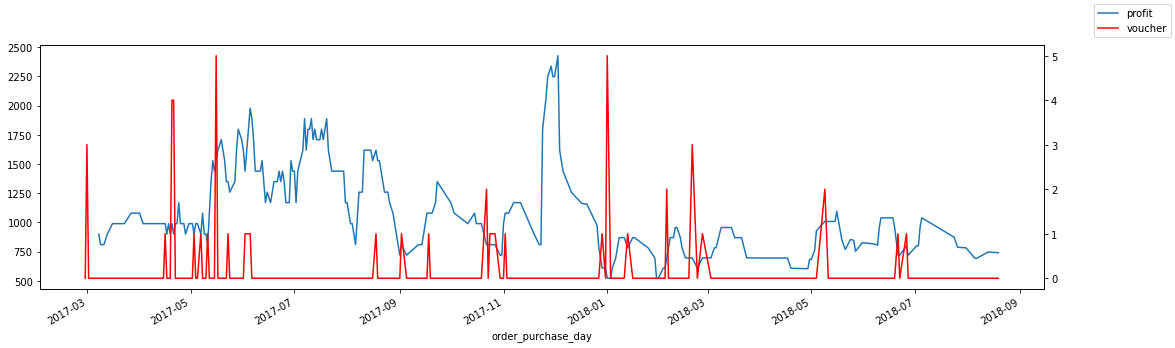

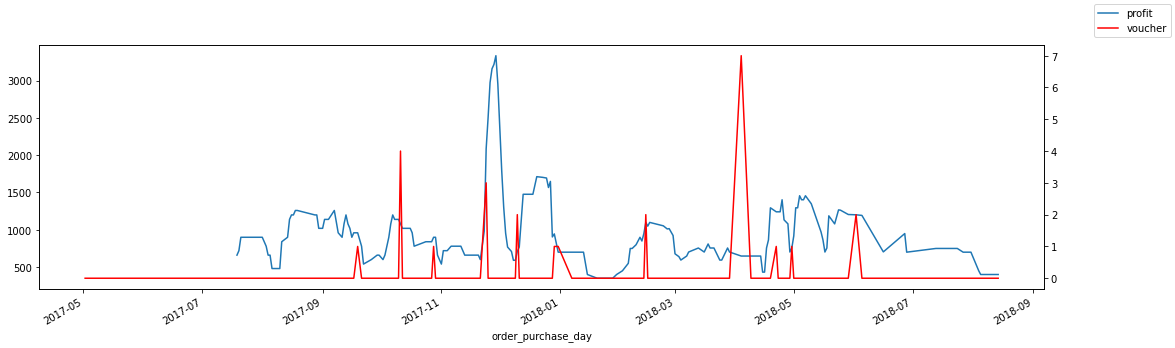

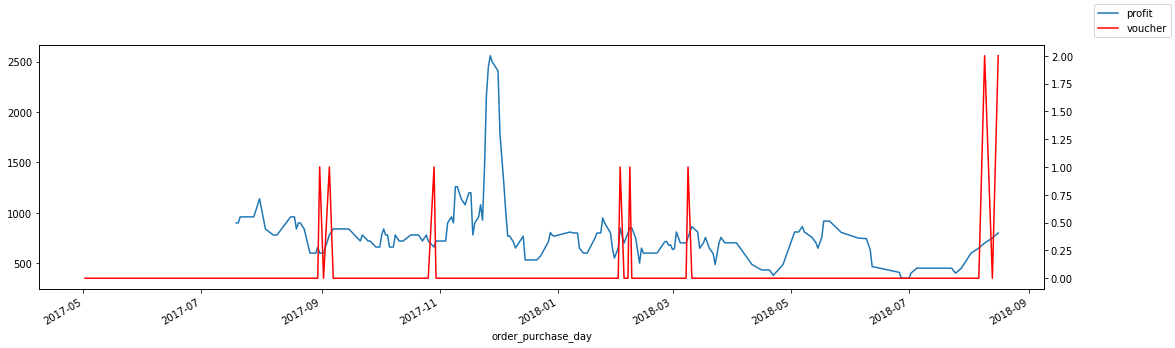

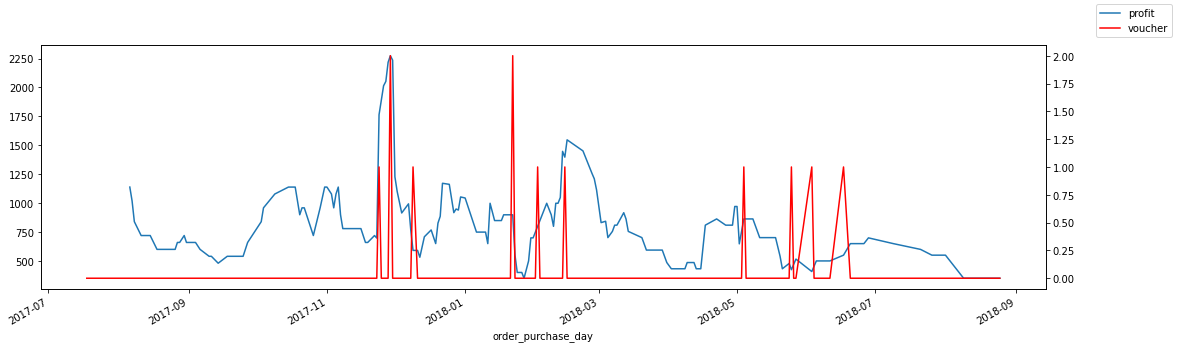

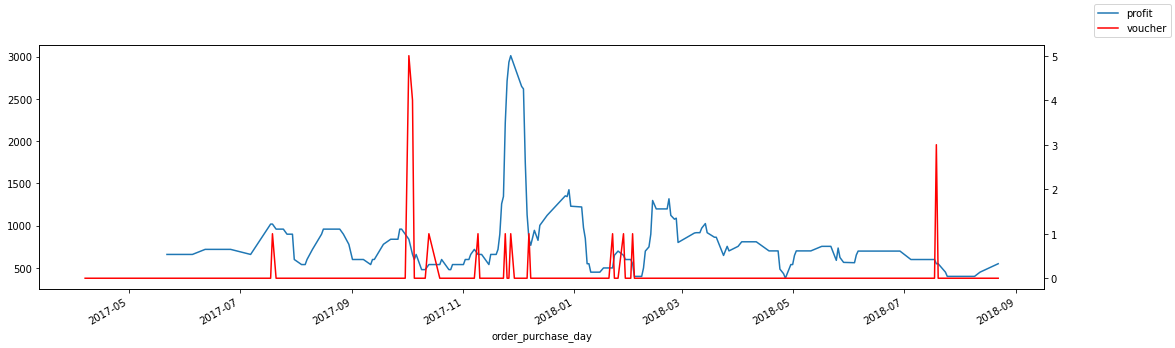

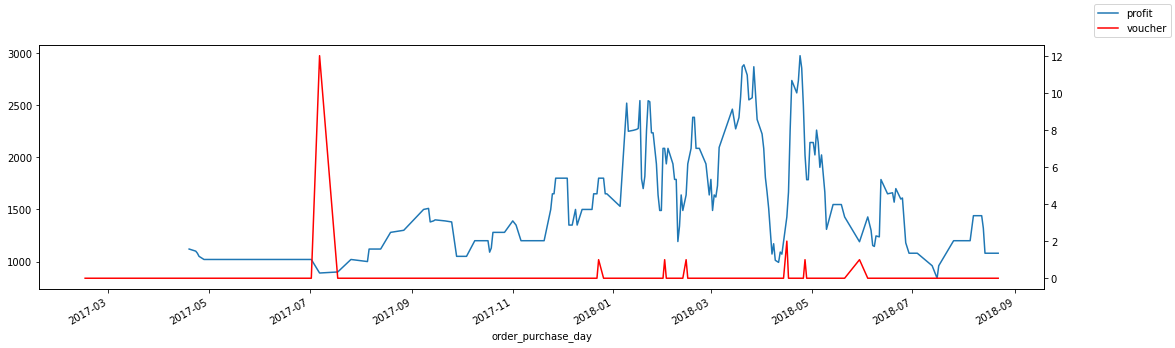

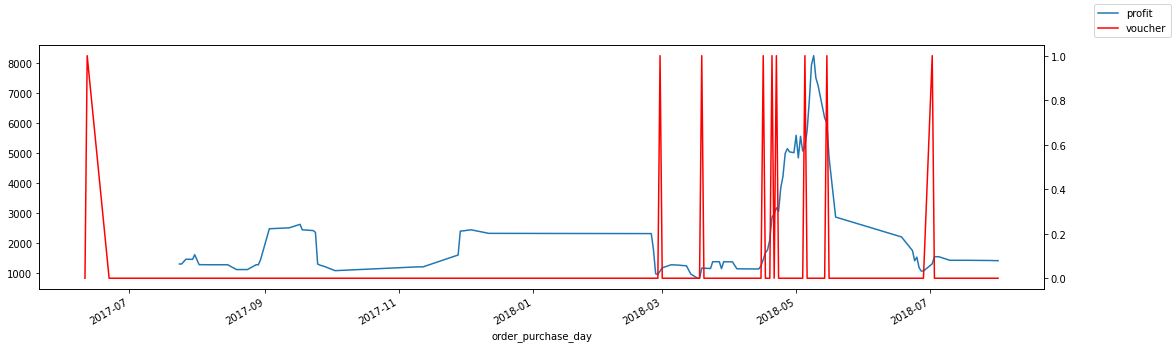

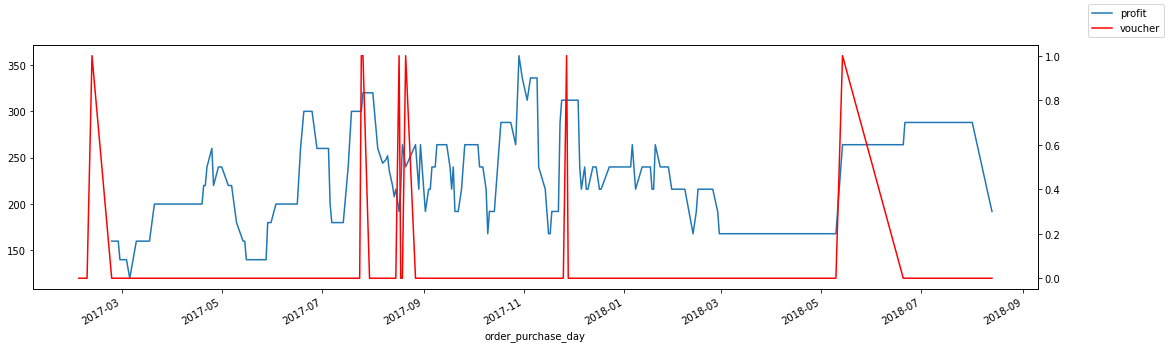

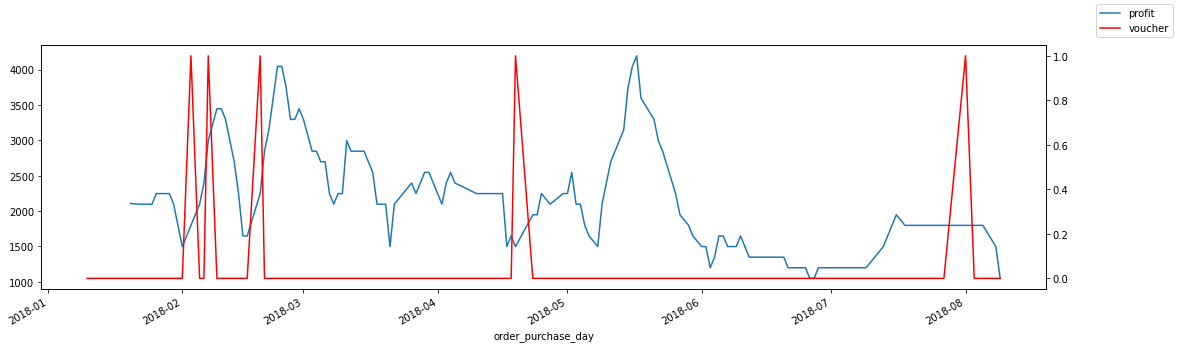

In [44]:
for product_id  in orders_product_df.product_id.value_counts().index[:10]:
    poi_product = get_poi_product(product_id)
    
    poi_product['get_voucher'] = poi_product.payment_type=='voucher'
    
    poi_sales = poi_product.groupby('order_purchase_day').product_id.count()
    poi_price = poi_product.groupby('order_purchase_day').price.mean()
    poi_voucher = poi_product.groupby('order_purchase_day').get_voucher.sum()
    poi_revenue = (poi_sales * poi_price)
    poi_profit = (poi_revenue - (poi_voucher * poi_price))

    poi_sales.name = 'sales'
    poi_revenue.name = 'revenue'
    poi_voucher.name = 'voucher'
    poi_profit.name = 'profit'
    
    twin_lineplot(poi_profit.rolling(7).sum(), poi_voucher)

### Is there any discounts (payment < price + freigt_value)?

* Ada yang `payment_value` nya nggak sesuai dari `price` + `freight_value`.
* cuma credit & debit card yang payment_valuenya nggak sesuai.

payments_df

In [45]:
price_payment_df = payments_df.merge(items_df, on='order_id')
price_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78
117599,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54


In [46]:
total_price_per_order = price_payment_df.groupby(['order_id', 'order_item_id']).price.mean().groupby('order_id').sum()
total_freight_value_per_order = price_payment_df.groupby(['order_id', 'order_item_id']).freight_value.mean().groupby('order_id').sum()
payment_per_order = price_payment_df.groupby(['order_id', 'payment_sequential']).payment_value.mean().groupby('order_id').sum()


total_order_df = pd.DataFrame({'price': total_price_per_order,
             'freight_value': total_freight_value_per_order,
             'payment_value': payment_per_order}).reset_index()
total_order_df

,order_id,price,freight_value,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04
...,...,...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,343.40
98661,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,386.53
98662,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,116.85
98663,fffe18544ffabc95dfada21779c9644f,55.99,8.72,64.71


In [47]:
print('transaction total:', total_order_df.shape[0])
print(total_order_df[total_order_df['freight_value'] + total_order_df['price'] != total_order_df['payment_value']].shape[0])
print(total_order_df[total_order_df['freight_value'] + total_order_df['price'] == total_order_df['payment_value']].shape[0])

transaction total: 98665
19765
78900


In [69]:
price_payment_different_df = total_order_df[np.abs(total_order_df['freight_value'] + total_order_df['price'] - total_order_df['payment_value']) > 0.1]
price_payment_different_df['difference'] =  price_payment_different_df['payment_value'] - (price_payment_different_df['freight_value'] + price_payment_different_df['price'])

display(price_payment_df[price_payment_df.order_id=='fd33085945f15975375cd8ec85440511'])
# display(price_payment_different_df[price_payment_different_df.order_id=='016726239765c18f66826453f39c64e3'])
# price_payment_different_df

/tmp/ipykernel_10529/2281625305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_payment_different_df['difference'] =  price_payment_different_df['payment_value'] - (price_payment_different_df['freight_value'] + price_payment_different_df['price'])


,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
22970,fd33085945f15975375cd8ec85440511,1,credit_card,6,212.82,1,cdb2152dbfd2aba4877dec3532c819e7,ce69a8021d18961dd2a40269b7c2c293,2018-08-22 19:50:11,217.99,16.63


In [79]:
orders_product_df[orders_product_df.order_id=='fd33085945f15975375cd8ec85440511']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_id,price,payment_type,order_purchase_week,order_purchase_day
53951,fd33085945f15975375cd8ec85440511,8071c6018a4f75f2afd849a34708e3a0,delivered,2018-08-20 19:34:29,2018-08-20 19:50:41,2018-08-21 11:10:00,2018-08-25 15:08:29,2018-09-04 00:00:00,cdb2152dbfd2aba4877dec3532c819e7,217.99,credit_card,138,2018-08-20


In [84]:
payments_df.set_index('order_id').loc[price_payment_different_df.order_id]

,payment_sequential,payment_type,payment_installments,payment_value
order_id,,,,
00789ce015e7e5791c7914f32bb4fad4,1,credit_card,10,190.81
016726239765c18f66826453f39c64e3,1,credit_card,10,265.77
01e51b7c3025655646143d09b911e1d7,1,credit_card,3,35.02
028aa7c930356788f861ed1b7f984819,1,credit_card,6,62.94
02f4dd90ba0feb8ec394cac05862d2b5,1,credit_card,6,141.65
...,...,...,...,...
faf132fb35b3b3b533a67efbd6e7c02d,1,credit_card,10,130.01
fbf352b18a26c6a86a53cca922facd25,1,credit_card,6,69.12
fbf352b18a26c6a86a53cca922facd25,2,voucher,1,91.68


In [95]:
payments_df[payments_df.order_id=='fbf352b18a26c6a86a53cca922facd25']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
17062,fbf352b18a26c6a86a53cca922facd25,1,credit_card,6,69.12
60371,fbf352b18a26c6a86a53cca922facd25,2,voucher,1,91.68


In [108]:
a = payments_df.set_index('order_id').loc[price_payment_different_df.order_id].reset_index()
for orders_id in a[a.payment_type=='voucher'].order_id:
#     print(orders_id)
    display(a[a.order_id==orders_id])

,order_id,payment_sequential,payment_type,payment_installments,payment_value
27,21ca56b276a6b8d082a1261f33786085,1,credit_card,4,44.80
28,21ca56b276a6b8d082a1261f33786085,2,voucher,1,21.66


,order_id,payment_sequential,payment_type,payment_installments,payment_value
30,2240d9349c55949c40dbfcc98ece280c,2,voucher,1,84.05
31,2240d9349c55949c40dbfcc98ece280c,1,credit_card,1,10.90


,order_id,payment_sequential,payment_type,payment_installments,payment_value
92,5af817dcc7682f13101dbdef134be4e0,1,credit_card,1,11.58
93,5af817dcc7682f13101dbdef134be4e0,2,voucher,1,33.84


,order_id,payment_sequential,payment_type,payment_installments,payment_value
102,6508f1528c3648c8a9f751e811520269,1,credit_card,1,13.41
103,6508f1528c3648c8a9f751e811520269,2,voucher,1,37.29


,order_id,payment_sequential,payment_type,payment_installments,payment_value
107,6aaedd714ad6929fc4df8d51bd4cfe9a,1,credit_card,2,50.12
108,6aaedd714ad6929fc4df8d51bd4cfe9a,2,voucher,1,12.87


,order_id,payment_sequential,payment_type,payment_installments,payment_value
263,f1c86b9191896bcf9077ec22b6248153,2,voucher,1,41.95
264,f1c86b9191896bcf9077ec22b6248153,1,credit_card,1,15.65


,order_id,payment_sequential,payment_type,payment_installments,payment_value
272,fbf352b18a26c6a86a53cca922facd25,1,credit_card,6,69.12
273,fbf352b18a26c6a86a53cca922facd25,2,voucher,1,91.68


In [49]:
payments_df.set_index('order_id').loc[price_payment_different_df.order_id].payment_type.value_counts()

credit_card    262
voucher          7
debit_card       7
Name: payment_type, dtype: int64

In [50]:
payments_df.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [51]:
price_payment_different_df.sort_values('difference')

,order_id,price,freight_value,payment_value,difference
14628,262118ce178bb3e4590a3adcf6d62e6b,119.80,57.94,126.12,-51.62
97605,fd33085945f15975375cd8ec85440511,217.99,16.63,212.82,-21.80
42504,6e57e23ecac1ae881286657694444267,330.00,20.41,333.91,-16.50
25102,4154bf1348caac78152fe76e3e9c4af8,149.90,15.36,150.27,-14.99
42292,6dcf0aeb8b1eb4021c26e1d0e9394979,299.00,34.92,318.97,-14.95
...,...,...,...,...,...
43437,70b7e94ea46d3e8b5bc12a50186edaf0,167.88,45.27,274.84,61.69
58752,996c7e73600ad3723e8627ab7bef81e4,559.90,28.00,664.43,76.53
43434,70b742795bc441e94a44a084b6d9ce7a,269.99,196.94,578.82,111.89
42515,6e5fe7366a2e1bfbf3257dba0af1267f,179.19,108.72,406.92,119.01


In [52]:
print('transaction total:', price_payment_df.shape[0])
print(price_payment_df[price_payment_df['freight_value'] + price_payment_df['price'] != price_payment_df['payment_value']].shape[0])
print(price_payment_df[price_payment_df['freight_value'] + price_payment_df['price'] == price_payment_df['payment_value']].shape[0])

transaction total: 117601
47970
69631


In [53]:
price_payment_df[price_payment_df['freight_value'] + price_payment_df['price'] == price_payment_df['payment_value']]

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88
7,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,1,42a2c92a0979a949ca4ea89ec5c7b934,813348c996469b40f2e028d5429d3495,2017-06-29 13:25:19,59.90,21.26
...,...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78
117599,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54


In [54]:
price_payment_different_df = price_payment_df[np.abs(price_payment_df['freight_value'] + price_payment_df['price'] - price_payment_df['payment_value']) > 0.01]

                                              
# (price_payment_different_df['freight_value'] + price_payment_different_df['price']) - price_payment_different_df['payment_value']
price_payment_different_df[price_payment_different_df.order_id=='2480f727e869fdeb397244a21b721b67']
# price_payment_different_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
12,2480f727e869fdeb397244a21b721b67,1,credit_card,1,141.9,1,d363e421b1d15376b299089946fed127,870d0118f7a9d85960f29ad89d5d989a,2017-12-19 18:59:27,54.9,15.56
13,2480f727e869fdeb397244a21b721b67,1,credit_card,1,141.9,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2017-12-19 18:59:27,59.0,12.44


In [55]:
payments_df.groupby(['order_id']).payment_sequential.count().sort_values()

order_id
00010242fe8c5a6d1ba2dd792cb16214     1
a9fa8567c21a5f8e4450af02a87f26cb     1
a9fa7ea99c0724de00e9d31f2a39a723     1
a9fa4232de4a87398cfab2a5bcbecc56     1
a9f99ebcef2a23dd06a0bd5ed649080e     1
                                    ..
fedcd9f7ccdc8cba3a18defedd1a5547    19
895ab968e7bb0d5659d16cd74cd1650c    21
285c2e15bebd4ac83635ccc563dc71f4    22
ccf804e764ed5650cd8759557269dc13    26
fa65dad1b0e818e3ccc5cb0e39231352    29
Name: payment_sequential, Length: 99440, dtype: int64

In [56]:
payments_df[payments_df.order_id=='3689194c14ad4e2e7361ebd1df0e77b0']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
21801,3689194c14ad4e2e7361ebd1df0e77b0,1,credit_card,1,95.74


In [57]:
payments_df[payments_df.payment_sequential==2]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
25,5cfd514482e22bc992e7693f0e3e8df7,2,voucher,1,45.17
75,3689194c14ad4e2e7361ebd1df0e77b0,2,voucher,1,57.53
102,21b8b46679ea6482cbf911d960490048,2,voucher,1,43.12
139,82ffe097d8ddbf319a523b9bbe7725d5,2,voucher,1,30.00
164,487c1451b8fd7347d0e80e5aca887e91,2,voucher,1,30.00
...,...,...,...,...,...
103499,08fa8b49ff198d1332df4668087150ed,2,voucher,1,50.00
103500,71853944ebfe6bd5f5de0302cba14354,2,voucher,1,29.18
103520,e2da042c42ce790c81ef3a9f666a92b6,2,voucher,1,67.33
103732,f0a5b7c94819c69d12a1c0458ec74756,2,voucher,1,80.40


In [58]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00
